1) Importe la base de datos a una base en Jupyter Notebook con pandas.


In [41]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor

import statsmodels.stats.api as sms
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.compat import lzip

df = pd.read_csv('Walmart(1).csv')

2) Obtenga los descriptivos resumen de la base de datos e identifique a las variables numéricas y categóricas. ¿Hay algo que le llame la atención?


In [24]:
df.describe()



,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [ ]:
df.dtypes

Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object

3) Evalúe si la base contiene datos perdidos.


In [ ]:
df.isna().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

4) Evalúe si alguna de las variables contiene datos atípicos (outliers)
De ser el caso, detalle cuáles y qué método estadístico aplicarán para corregir.


<ipython-input-42-dc616d3e504e>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


Text(0.5, 1.0, 'Unemployment')

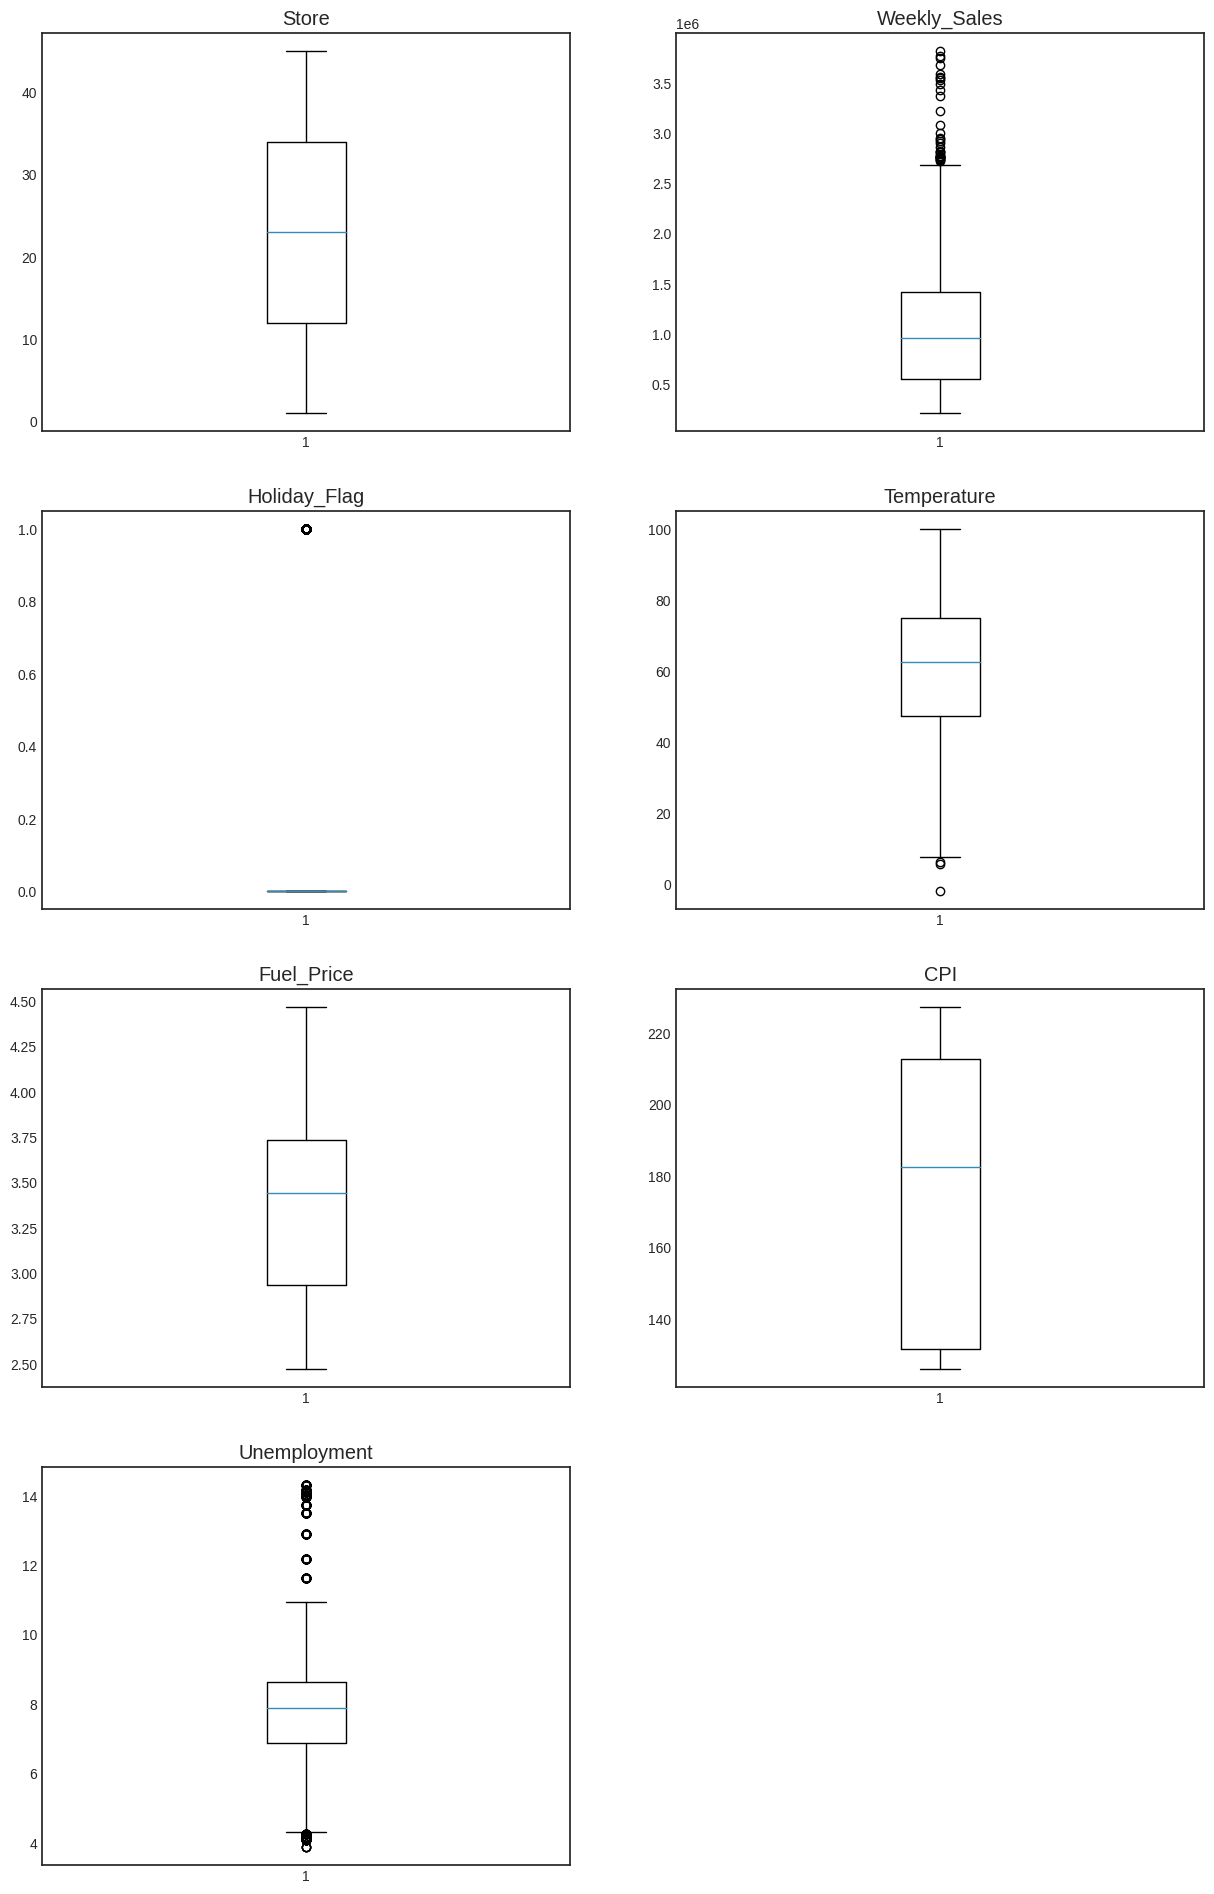

In [42]:
plt.figure(figsize = (15, 30))
plt.style.use('seaborn-white')
ax=plt.subplot(521)
plt.boxplot(df['Store'])
ax.set_title('Store')
ax=plt.subplot(522)
#plt.boxplot(df['Date'])
#ax.set_title('Date')
ax=plt.subplot(522)
plt.boxplot(df['Weekly_Sales'])
ax.set_title('Weekly_Sales')
ax=plt.subplot(523)
plt.boxplot(df['Holiday_Flag'])
ax.set_title('Holiday_Flag')
ax=plt.subplot(524)
plt.boxplot(df['Temperature'])
ax.set_title('Temperature')
ax=plt.subplot(525)
plt.boxplot(df['Fuel_Price'])
ax.set_title('Fuel_Price')
ax=plt.subplot(526)
plt.boxplot(df['CPI'])
ax.set_title('CPI')
ax=plt.subplot(527)
plt.boxplot(df['Unemployment'])
ax.set_title('Unemployment')

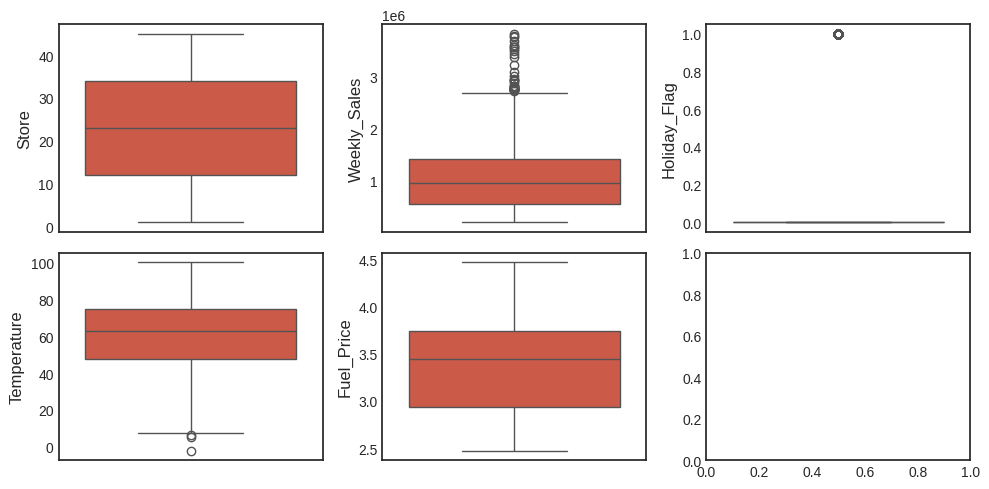

In [43]:
# Box plots
fig, axs = plt.subplots(2,3, figsize = (10,5))
plt1 = sns.boxplot(df['Store'], ax = axs[0,0])
plt2 = sns.boxplot(df['Weekly_Sales'], ax = axs[0,1])
plt3 = sns.boxplot(df['Holiday_Flag'], ax = axs[0,2])
plt1 = sns.boxplot(df['Temperature'], ax = axs[1,0])
plt2 = sns.boxplot(df['Fuel_Price'], ax = axs[1,1])

plt.tight_layout()

In [44]:
#Reemplazamos la variable numérica "Sales" por la media
df['Weekly_Sales'].fillna(df['Weekly_Sales'].mean(), inplace=True)
str(df['Weekly_Sales'].isnull().sum())
#Reemplazamos las variable categóricas 'TV', 'Radio', 'Social Media' por la moda
df['Temperature'].fillna(df['Temperature'].mode()[0], inplace=True)
df['Unemployment'].fillna(df['Unemployment'].mode()[0], inplace=True)
str(df['Weekly_Sales'].isnull().sum())
str(df['Temperature'].isnull().sum())
str(df['Unemployment'].isnull().sum())

'0'

5) Grafique las distribuciones de las vsriables y a priori comente sobre ellas.


Text(0.5, 0, 'Store')

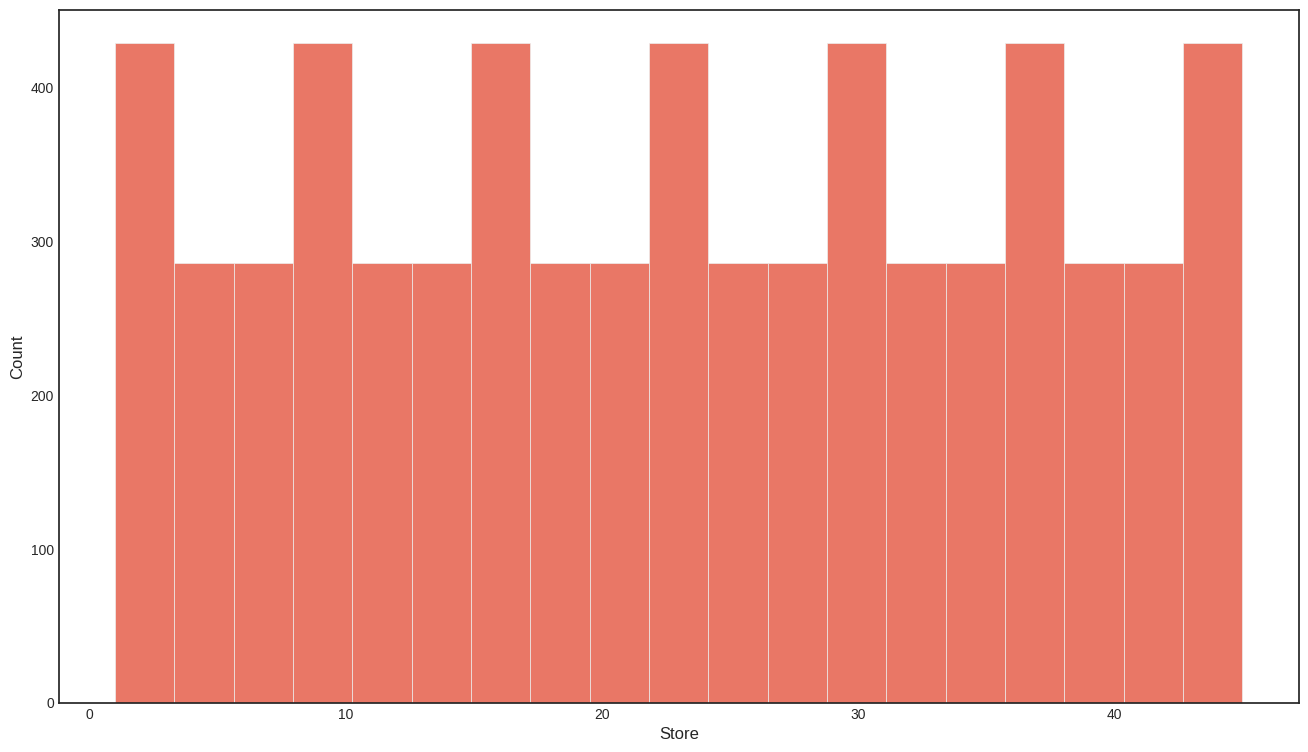

In [11]:
h = sns.histplot(data = df, x = 'Store')
h.set_xlabel('Store')



Text(0.5, 0, 'Weekly_Sales')

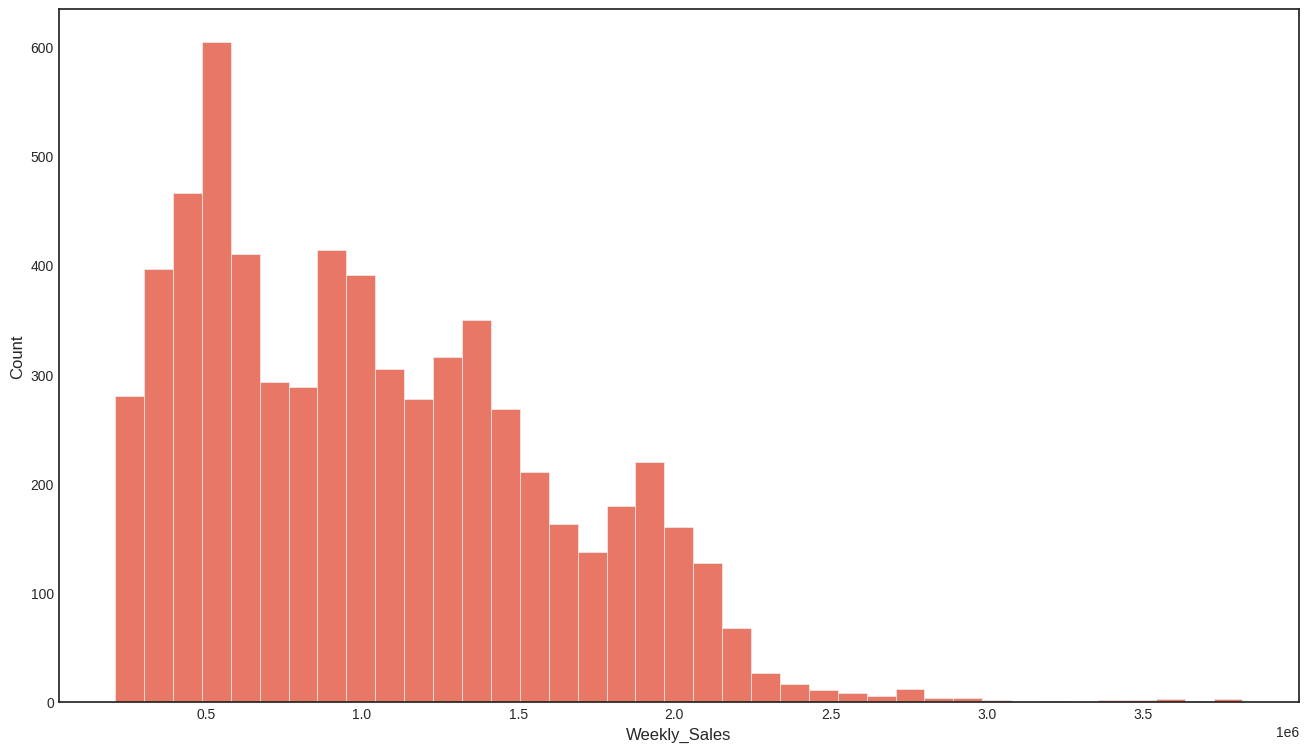

In [19]:
h = sns.histplot(data = df, x = 'Weekly_Sales')
h.set_xlabel('Weekly_Sales')


Text(0.5, 0, 'Holiday_Flag')

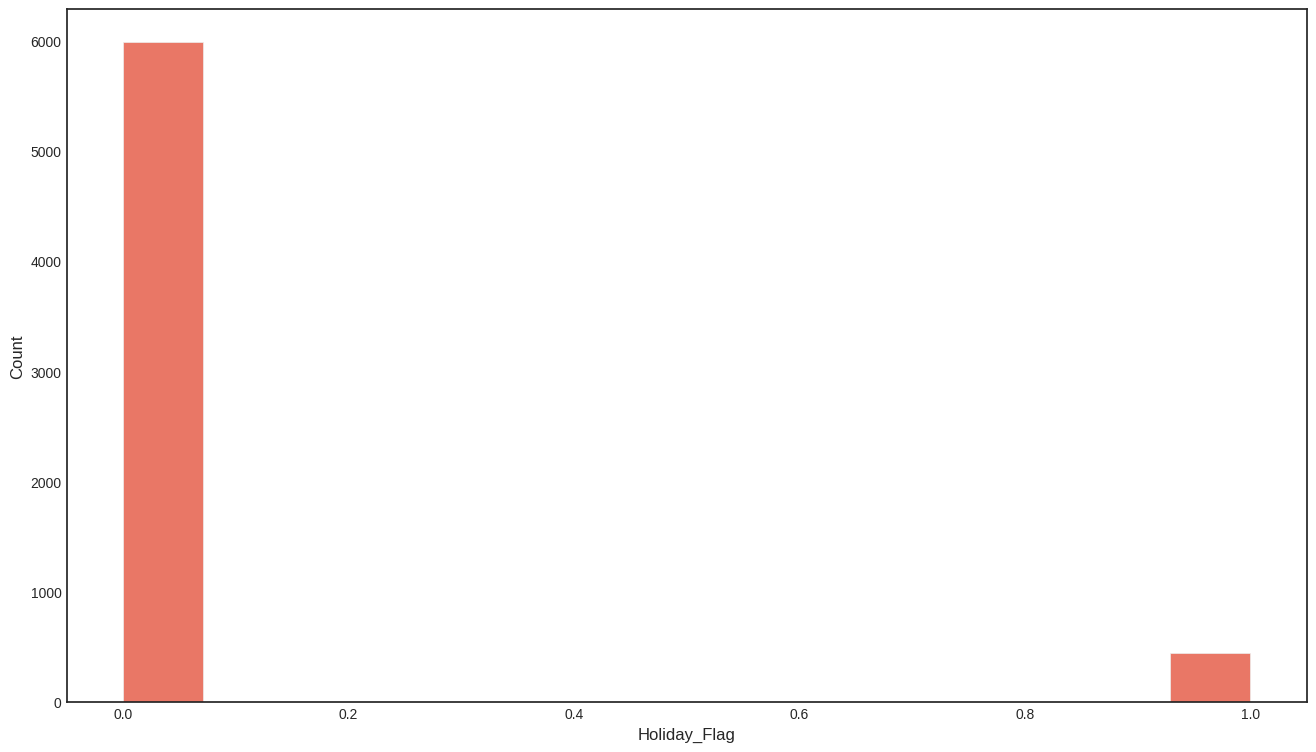

In [14]:
h = sns.histplot(data = df, x = 'Holiday_Flag')
h.set_xlabel('Holiday_Flag')


Text(0.5, 0, 'Temperature')

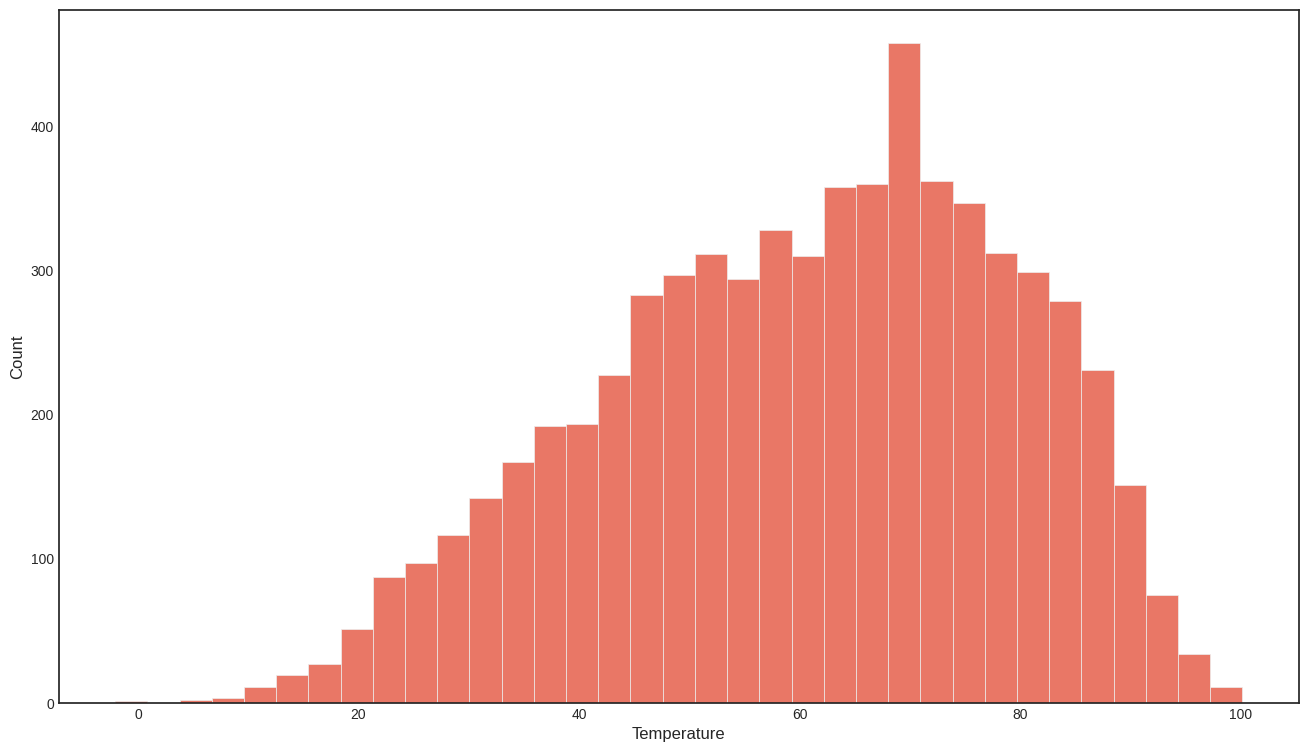

In [16]:
h = sns.histplot(data = df, x = 'Temperature')
h.set_xlabel('Temperature')


Text(0.5, 0, 'Fuel_Price')

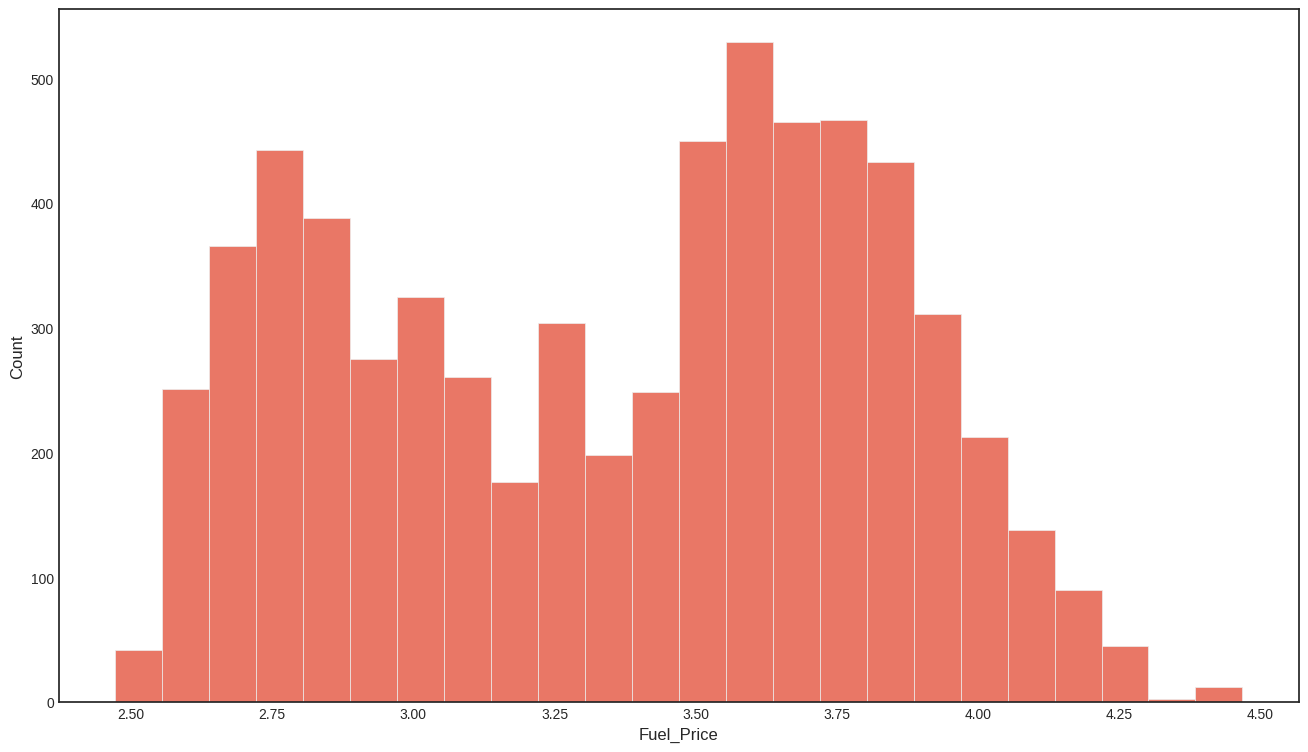

In [20]:
h = sns.histplot(data = df, x = 'Fuel_Price')
h.set_xlabel('Fuel_Price')


Text(0.5, 0, 'CPI')

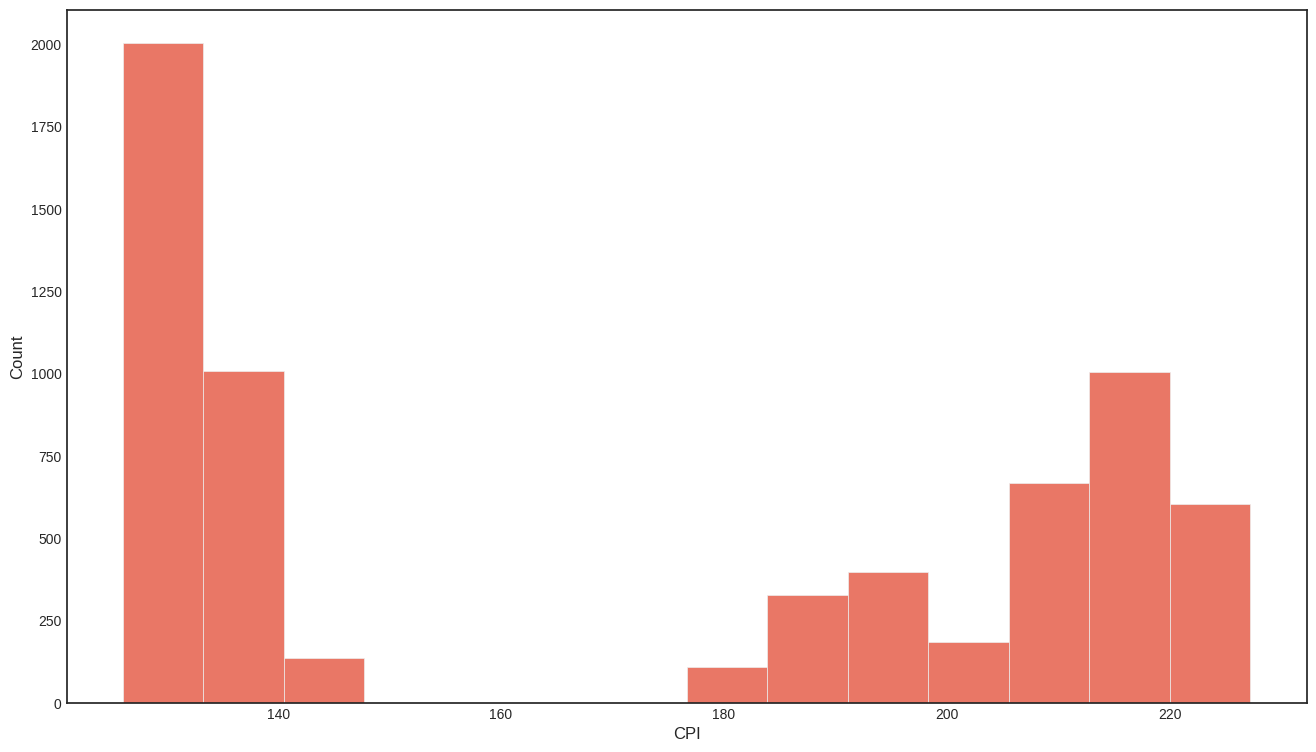

In [21]:
h = sns.histplot(data = df, x = 'CPI')
h.set_xlabel('CPI')


Text(0.5, 0, 'Unemployment')

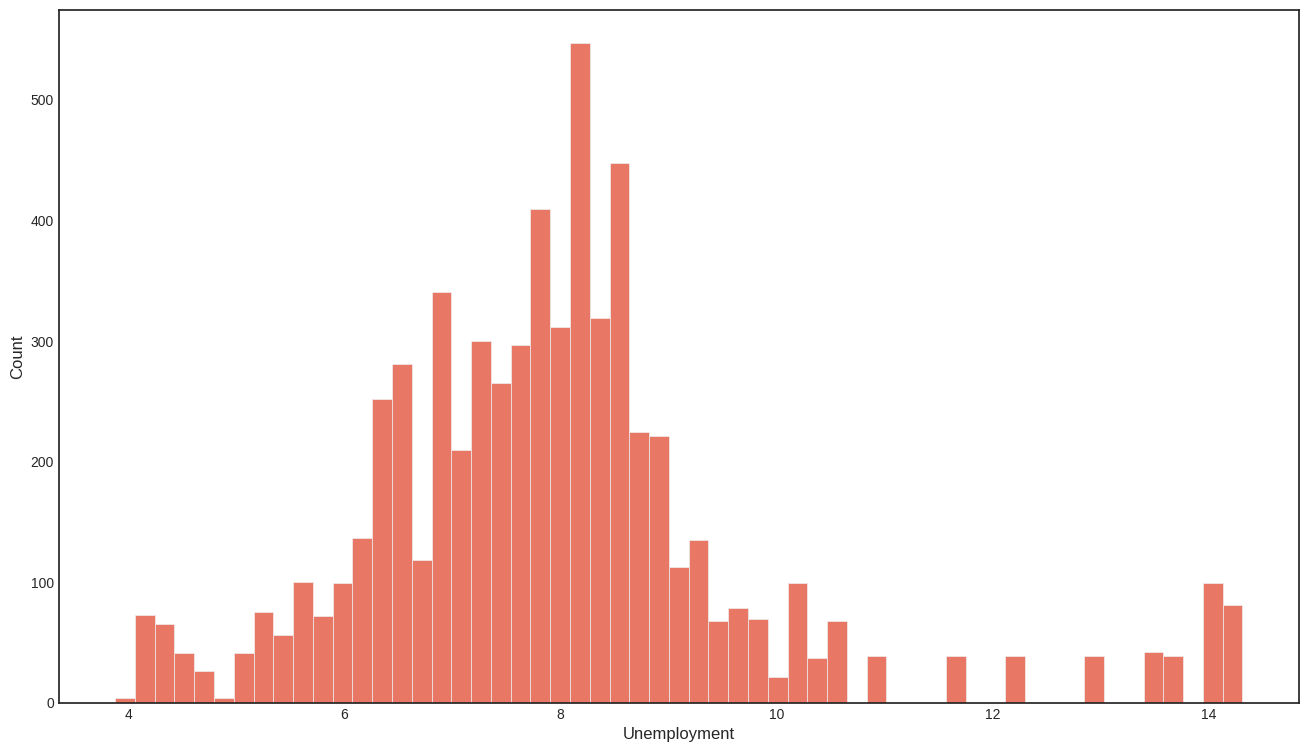

In [22]:
h = sns.histplot(data = df, x = 'Unemployment')
h.set_xlabel('Unemployment')

6) Obtenga las correlaciones entre los datos de corte numérico.
Comente que variable escogerán como variable dependiente y que variables introducirán a su modelo.


In [23]:
df.corr().style.background_gradient(cmap='coolwarm')

<ipython-input-23-699201837c09>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr().style.background_gradient(cmap='coolwarm')


,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Store,1.000000,-0.335332,-0.000000,-0.022659,0.060023,-0.209492,0.223531
Weekly_Sales,-0.335332,1.000000,0.036891,-0.063810,0.009464,-0.072634,-0.106176
Holiday_Flag,-0.000000,0.036891,1.000000,-0.155091,-0.078347,-0.002162,0.010960
Temperature,-0.022659,-0.063810,-0.155091,1.000000,0.144982,0.176888,0.101158
Fuel_Price,0.060023,0.009464,-0.078347,0.144982,1.000000,-0.170642,-0.034684
CPI,-0.209492,-0.072634,-0.002162,0.176888,-0.170642,1.000000,-0.302020
Unemployment,0.223531,-0.106176,0.010960,0.101158,-0.034684,-0.302020,1.000000


7) Indique que tipo de modelación realizarán y porqué.


In [45]:
#Aplicamos Logaritmos
log_Sales=np.log(df.Weekly_Sales)
df['log_Sales']=log_Sales

#Generamos la regresión
regresion = ols("log_Sales ~ Store", data=df)
results = regresion.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              log_Sales   R-squared:                       0.087
Model:                            OLS   Adj. R-squared:                  0.087
Method:                 Least Squares   F-statistic:                     612.2
Date:                Mon, 18 Mar 2024   Prob (F-statistic):          3.44e-129
Time:                        02:09:30   Log-Likelihood:                -5424.0
No. Observations:                6435   AIC:                         1.085e+04
Df Residuals:                    6433   BIC:                         1.087e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     14.0090      0.014    982.832      0.0

8) Verifique los supuestos, de haber escogido el enfoque econométrico.


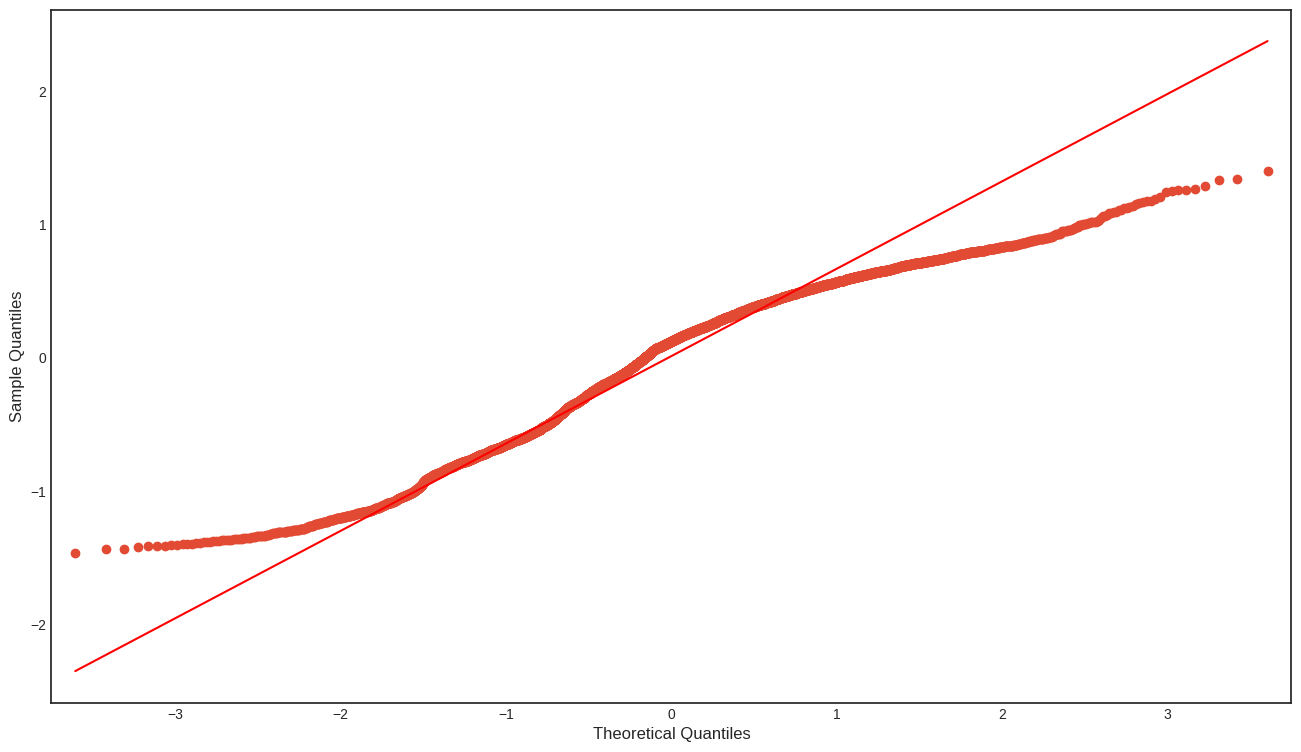

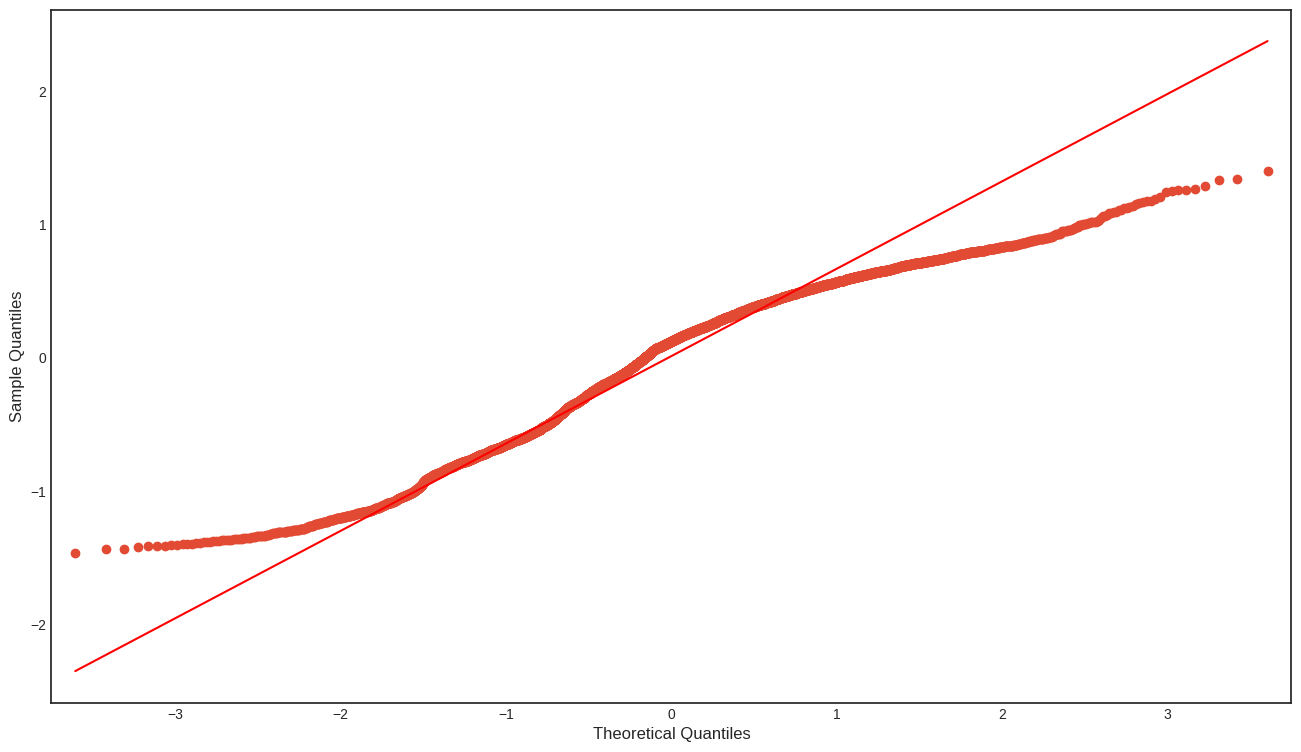

In [46]:
#Normalidad de los residuos
sm.qqplot(results.resid, line='q')

In [31]:
#Realizamos el test de Jacq Bera:
nombres = ["Jarque-Bera", "Chi^2 two-tail prob.", "Skew", "Kurtosis"]
jarque_bera = sms.jarque_bera(results.resid)
lzip(nombres, jarque_bera)

[('Jarque-Bera', 362.79530857808203),
 ('Chi^2 two-tail prob.', 1.6595858071814322e-79),
 ('Skew', -0.4797069495220763),
 ('Kurtosis', 2.342270795633608)]

In [29]:
#También podemos validar los supuestos sacando la Media:
results.resid.mean()
#La media de los residuos tiende a cero y es muy pequeña por lo que no se estaría violando este supuesto.

-8.954936421156819e-15

In [33]:
y_pred=results.predict()

In [47]:
sns.residplot(y_pred, results.resid)
plt.xlabel("y_pred")
plt.ylabel("residuos")
plt.title("Gráfica de residuos")

TypeError: residplot() takes from 0 to 1 positional arguments but 2 were given

9) Obtenga el modelo definitivo, prediga los valores y comente el grado de ajuste del modelo. Justifique con métricas su respuesta.


10) Grafique a los valores predicho de modelo vs los valores reales.
¿Cómo se ven una vez graficados frente a los valores reales? Argumente su respuesta.


In [30]:
df3=df[df.columns.difference(['TV', 'log_Sales'])]
df3=df3[['Radio', 'Social Media', 'Influencer']]
df3

results.predict()



KeyError: "None of [Index(['Radio', 'Social Media', 'Influencer'], dtype='object')] are in the [columns]"

11)  Concluya sobre su modelo. Para ello, si escogió el enfoque econométrico, interprete coeficientes, por el contrario si escogió el enfoque de machine learning, determine cuáles son las variables que tienen mayor poder explicativo sobre su variable objetivo.